# PRÁCTICA 2 
## TIPOLOGIA Y CICLO DE VIDA DE LOS DATOS
### Autor: Mohamed Azar

### 1. Descripción del dataset. 
#### ¿Por qué es importante y qué pregunta/problema pretenderesponder?

Este dataset que detalla los datos de  los pasajeros que viajaban aquel trájico dia abordo del Titanic , no incluye la edad  ni información de la tripulación. El problema que se pretende resolver es predecir la supervivencia o no de un pasajero en función de sus variables para poder entender mejor cuales son las razones que propiciaron que algunos se pudieran salvar mientras que otros lamentablemente perdieran la vida aquel día. 

Este dataset de Titanic esta compuesto por 12 variables diferentes como se puede observar :

In [1]:
import pandas as pd
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


De entre estas varibales disponemos de las siguientes consideradas categóricas Survived,Embarked,Sex y Pclass.

El significado de estas variables se puede ver en detalle en la siguiente tabla :

- Survival : Esta variable codifica con un 1 si el pasajero sovrevivió o con 0 si no consigió salvarse. 
- Pclass : Representa en que clase viajaba el pasajero pudiendo ser 1ª , 2ª o 3ª. Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex : Representa el género del pasagero .
- Age : Número que codifica la edad del pasagero.
- Sibsp : Variable binaria si su pareja viajaba abordo.
- Parch :Variable binaria que representa si tenía hijos abordo.
- Ticket : Identificador del billete del pasajero.
- Fare : Tárifa que pago el pasajero por embarcar.
- Cabin : Número de Cabina .
- Embarked : Puerto de  Embarque del pasajeropudiendo ser : 	C = Cherbourg, Q = Queenstown, S = Southampton

En este conjunto de datos disponemos de variables númericas :

- Continuas como Age y Fare.
- Discretas como SibSp y Parch.

### 2. Integración y selección de los datos de interés a analizar.

La gran mayoría d elos atributos de este dataset aportan información reelevante para la pregunta con la que partimos a analizar este dataset, prescindiremos de cabin por ser muy incompleta y del identificador del Ticket , ya que no lo es reelevante.

In [2]:
del train['Ticket']
del train['Cabin']
del train['PassengerId']

In [27]:
del train['Name']

### 3. Limpieza de los datos.
#### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?

Tanto Cabin , Age y Embarked   contaienen valores vacios  en nuestro conjunto train.

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Intentaremos arreglarlo tenemos la ventaja de que para la Edad disponemos del nombre en el cual tenemos disponemos de información reelevante para llevar a cabo esta tarea , son los "Mr","Miss" que nos pueden dar una idea de la edad aproximada del pasajero.

In [7]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') 
## Coregimos las mal escritas 
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
## Calculamos la edad media de la inicial del nombre
print(train.groupby('Initial')['Age'].mean())

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64


In [8]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

En cuanto a los 2 valores nulos de la variable embarqued es conveniente rellenar con el valor más frecuente , ya que esto minimiza la probabilidad de error.

In [10]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Dado que el puerto por el que embarcaron más personas fue el S , rellenaremos con este valor los valores nulos.

In [11]:
train['Embarked'].fillna('S',inplace=True)

Comprobamos que no queda ningun valor null :

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Initial        0
dtype: int64

#### 3.2. Identificación y tratamiento de valores extremos.

Vamos a emplear una tabla de estadisticos para detectar valores atípicos en nuestras variables.

In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.841942,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.281525,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La variable que podría preocuparnos sería la tarifa ya que esta muy sesgada , pero como no es la variable objetivo no nos preocupa excesivamente por tanto la dejaremos son modificar.

### 4. Análisis de los datos.
#### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).

Nos gustaría poder saber con los datos que disponemos si existía alguna variable clara que pueda darnos mas probabilidades de sobrevivir.
- ¿Existen diferencias en la supervivencia de hombres y mujeres? 
- ¿Los niños sobreviven más?
- ¿Es más dificil sobrevivir si tienes más hijos abordo?

#### 4.2. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

Vamos a dibujar un mapa de correlacion entre las variables para ver como se asemejean las variables.

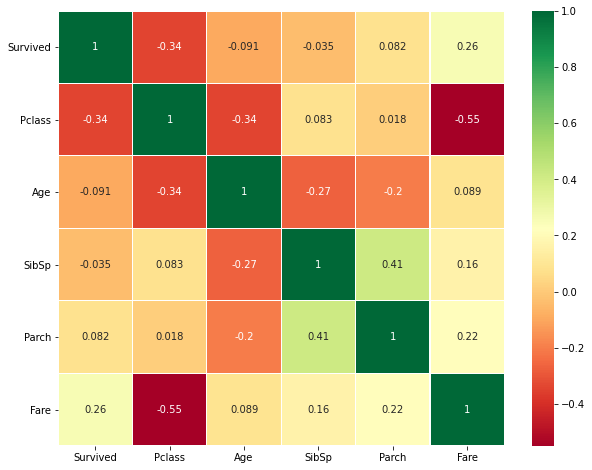

In [24]:
import matplotlib.pyplot as plt
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

A la luz del mapa de correlación entre variables podemos concluir que no hay variable especialmente correlacionadas la más grande Parch con SibSp.

In [30]:
genders = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(genders)

In [32]:
ports = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(ports)

In [35]:
del train['Initial']

Ajustando un random forest con los datos del Titanica podemos observar que se consigue una accuracy buena, y podemos ver directamente la contribución de cada variable a ese resultado.Permitiendonos observar más en detalle lo que ocurrio aquella noche.

In [37]:
from sklearn.ensemble import RandomForestClassifier
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)


random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [45]:
print("La accuracy conseguida por el random forest es de : ",acc_random_forest )

La accuracy conseguida por el random forest es de :  98.2


Ese resultado tan alto se explica por las siguientes variables en orden de importancia.

In [46]:
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.275
Age,0.264
Sex,0.256
Pclass,0.082
SibSp,0.053
Parch,0.036
Embarked,0.033


### 5. Representación de los resultados a partir de tablas y gráficas.

Una de las variables que han destacado en los analisis es la clase en la que viajaba cada pasajero , vamos a visualizar la probabilidad de superviviencia por clase.

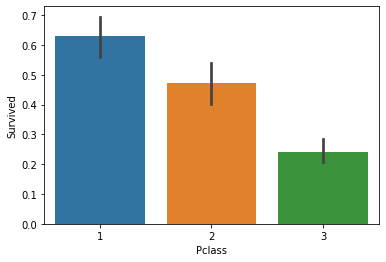

In [18]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=train)

Como se puede observar cuanto mas lujosa fuera la clase las probabilidades de sobrevivir fueron mayores , seguramente porque aquella noche fueron los primeros en ser avisados y los botes disponibles de supervivenvcia fueron primero para ellos.

A pesar de que en los analisis no fuera reelevante no quiero terminar el analisis , sin mirar que pasa con la probabilidad de supervivencia a medida que se tienen más hijos abordo , que logicamente debería disminuir porque te tienes que preocupar de que tus familiares hayan salido para poder evacuar.

/home/datasci/.local/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/datasci/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


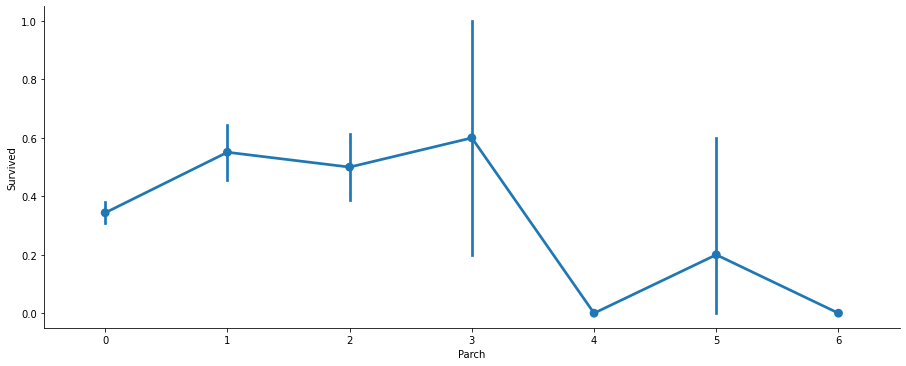

In [48]:
axes = sns.factorplot('Parch','Survived', data=train, aspect = 2.5, )

#### 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?

Los resultados son suficientes para resolver el problema que planteamos al inicio del ejercicio y se fundamente en las siguientes dos conlusiones : 

- El género del pasajero no parece tan reelevnate como se pensaba , ya que no esta en primer lugar como podría parecer por la tipica frase de "Las damas primero" , en este caso lamentablemente no fue así.

- Destaca la tarífa y Pclass asociacdos principalemente a la clase social y estatus del pasajero como factor que más aumento la probabilidad de salvarse.

